<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [49]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [50]:
# Answer: use .shape attribute which returns 979 rows and 6 columns
movies.shape

(979, 6)

#### Check the data type of each column.

In [51]:
# Answer: use .dtypes attribute
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [52]:
# Answer: use .mean() method of the duration column
movies.loc[:, 'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [53]:
# Answer: use .sort_values() method to sort ascending, use .head(1) and .tail(1) methods to identify the top and bottom movie based on duration 
print(movies.sort_values('duration').head(1).loc[:, ['title', 'duration']]) #returns the shortest movie
print(movies.sort_values('duration').tail(1).loc[:, ['title', 'duration']]) #returns the longest movie

      title  duration
389  Freaks        64
      title  duration
476  Hamlet       242


#### Create a histogram of duration, choosing an "appropriate" number of bins.

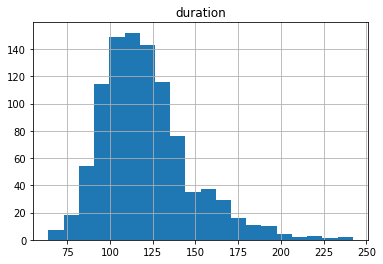

In [54]:
# Answer: use .hist() method to plot histogram using the duration column
axes = movies.hist('duration', bins=20); #20 bins seem to be reasonable, not too spikey and not too few groupings

#### Use a box plot to display that same data.

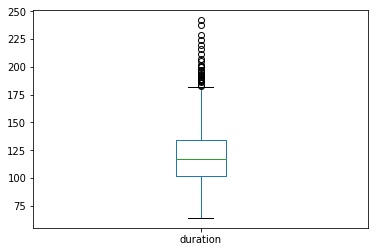

In [55]:
# Answer: use .plot.box() methods
axes = movies.loc[:, 'duration'].plot.box();

## Intermediate level

#### Count how many movies have each of the content ratings.

In [56]:
# Answer: use loc to include all the rows from the content_raing column and use value.counts() method
movies.loc[:, 'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

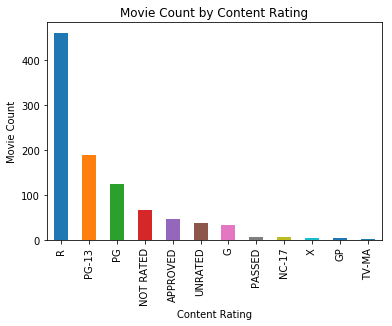

In [57]:
# Answer: use.plot method and specify type
ax = movies.loc[:, 'content_rating'].value_counts().plot(kind='bar')
ax.set_xlabel('Content Rating')
ax.set_ylabel('Movie Count')
ax.set_title('Movie Count by Content Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [81]:
# Answer: define a variable with the list of the values to be changed. use .replace() method to list this variable as the existing values , follwed by new value (UNRATED), update original dataframe with inplace and then count values to show results
new_rating_a = ['NOT RATED', 'APPROVED', 'PASSED', 'GP'] 
movies.loc[:, 'content_rating'].replace(new_rating_a,'UNRATED', inplace=True)
movies.loc[:, 'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [82]:
#Answer: define a variable with the list of the values to be changed. use .replace() method to list this variable as the existing value , follwed by new value (NC-17), , update original dataframe with inplace and then count values to show results
new_rating_b = ['X', 'TV-MA'] 
movies.loc[:, 'content_rating'].replace(new_rating_b,'NC-17', inplace=True)
movies.loc[:, 'content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [60]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [84]:
# Answer: 1) Use loc to filter for the 3 null rows within content_rating and display all columns --> movies.loc[movies.loc[:,'content_rating'].isnull(), :] 
# 2) The content_rating shows "NaN", so recommend we assign these to UNRATED
movies.loc[:, 'content_rating'].fillna(value='UNRATED', inplace=True)
movies.loc[:, 'content_rating'].value_counts()
# 3) Results: UNRATED has increased from 160 to 163 after including the 3 missing values

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [85]:
# Answer: use loc to find the duration column and add condition >= or < 120 (minutes).  There is very minimal difference (7.9 vs 7.8) in star rating based on duration.   
long_movies = movies.loc[:, 'duration'] >= 120
print(movies.loc[long_movies,'star_rating'].mean(), 'Avg. star rating for movies >= 2 hours')
long_movies = movies.loc[:, 'duration'] < 120
print(movies.loc[long_movies,'star_rating'].mean(), 'Avg. star rating for movies < 2 hours')

7.948898678414082 Avg. star rating for movies >= 2 hours
7.838666666666657 Avg. star rating for movies < 2 hours


#### Use a visualization to detect whether there is a relationship between duration and star rating.

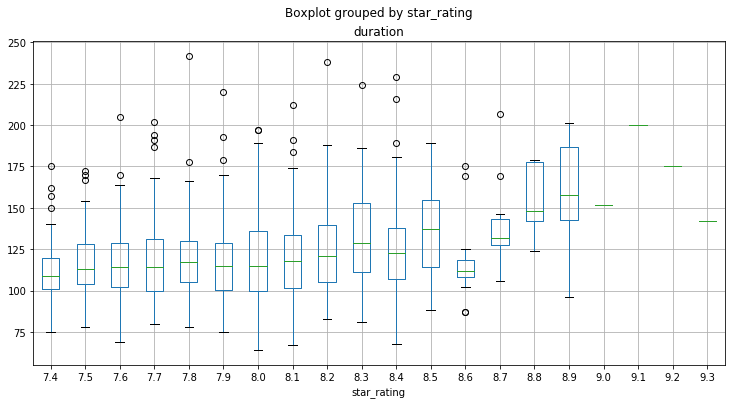

In [86]:
# Answer: originally used scatter plot, but results were difficult to interpret. Instead used Boxplot showing a clearer relationship between star rating and duration. 
#Looks like movies that have shorter duration are more likely to get rated.  There are lots of outliers for movies of longer duration across most star ratings.
ax = movies.boxplot(column='duration', by='star_rating', figsize=(12, 6))

#### Calculate the average duration for each genre.

In [87]:
# Answer: use groupbyto split-apply-combine, i.e. separate by genre, calculate average (mean) for each group and then combine back together
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

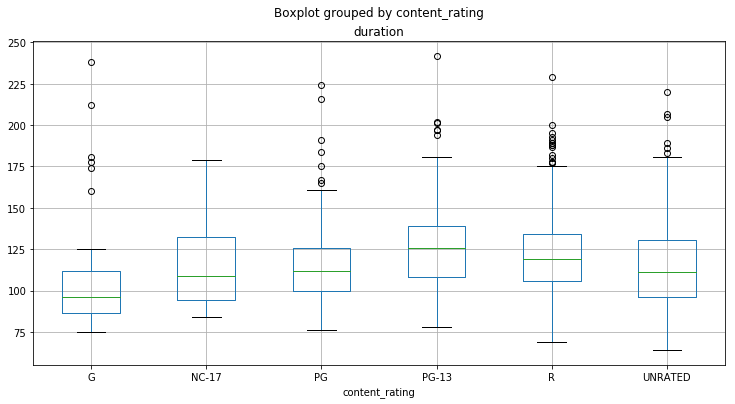

In [88]:
# Answer: use boxplot to see relationship between content rating and duration.  
ax = movies.boxplot(column='duration', by='content_rating', figsize=(12, 6))

#### Determine the top rated movie (by star rating) for each genre.

In [89]:
# Answer: see steps below
#(1) group by genre and movie title
#(2) calculate max star rating
#(3) sort descending by star rating
movies.groupby(['genre','title'])['star_rating'].max().sort_values(ascending=False)
#not sure how to display only the first row within each combination of genre and title?  Think I need to sort first, groupby and then take first row .head(1) of each combination.

genre      title                                            
Crime      The Shawshank Redemption                             9.3
           The Godfather                                        9.2
           The Godfather: Part II                               9.1
Action     The Dark Knight                                      9.0
Adventure  The Lord of the Rings: The Return of the King        8.9
Western    The Good, the Bad and the Ugly                       8.9
Biography  Schindler's List                                     8.9
Crime      Pulp Fiction                                         8.9
Drama      Fight Club                                           8.9
           12 Angry Men                                         8.9
           Forrest Gump                                         8.8
Adventure  The Lord of the Rings: The Two Towers                8.8
Action     Inception                                            8.8
Adventure  The Lord of the Rings: The Fellowship of the

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [90]:
# Answer: These are not actually duplicates since the same movie was produced multiple times.  Examining the data shows different star ratings, durations, and  
#list of actors for movies with the same title.
#(1) Identify which movies have value count > 1 
movies.loc[:, 'title'].value_counts() > 1  
#(2) Resulted in the following movies: True Grit, Les Miserables, The Girl with the Dragon Tattoo, Dracula
#(3) Filtered for these movies using a new variable
movies_to_check = movies.loc[:, 'title'].isin(['True Grit', 'Les Miserables', 'The Girl with the Dragon Tattoo', 'Dracula'])
#(4) view all columns for these filtered movie title rows
movies.loc[movies_to_check, :]

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [91]:
# Answer:
#movies.loc[:, 'genre'].value_counts() --> Use this to identify the list of relevant genres 
relev_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery'] #manually create list of relevant genres
new_df = movies.loc[movies.genre.isin(relev_genres), :] #create a new dataset filtered for the relevant genres using isin
new_df.groupby(['genre'])['star_rating'].mean() #groupby genre and calculate average star rating using .mean() method

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [69]:
# Answer: unable to solve this one...had some ideas.  Not sure how to filter on value_counts since it's a method and not a column

#movies.loc[:, 'genre'].value_counts()
#movie_cnt.loc[(movie_cnt.loc[:,'count'] >= 10), :] #apply filter for count >= 10
#movie_cnt >= 10 #filter this variable
#new_df_a = movies.loc[movie_cnt, :] #create a new dataframe with the filtered data
#new_df_a.groupby(['genre'])['star_rating'].mean() #use groupby

SyntaxError: 'return' outside function (<ipython-input-69-882d0d8850fd>, line 5)

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [93]:
# Answer: unable to solve this one...
#movies.groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [92]:
# Answer: used agg method to calculate count and mean.  filtered by the count column to display correct results.
new_dataset = movies.groupby('genre')['star_rating'].agg(['count', 'mean']) #groupby genre and use agg function to calculate count and mean of star rating. save this as a new variable (new_ataset)
new_dataset.loc[(new_dataset.loc[:,'count'] >= 10), :] #apply filter for count >= 10

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [105]:
#Would like to create a pareto by actor to see the number of times they appeared in the movies dataframe
#The list of actors for each movie is concatenated into one long string. Need to conver the string into a list and use for Loop to evalute each element within the list.  
but not sure how to do that with a string
Need to use replace method to remove invalid characters and for loop to review each element within the string.

#words = []
#x = movies.loc[:, 'actors_list'].split(",")
#words.append(x)
#print(words)

AttributeError: 'Series' object has no attribute 'split'